## Ciencias de Dados para Engenheiros

1 - Crie um Modelo de Regressão Linear para prever o valor do Aluguel;

2 - Crie um Modelo de Regressão Logística para prever se haverá doença.

## Regressão Linear

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [76]:
df_aluguel = pd.read_csv('./dados/houses_to_rent.csv')
df_cancer = pd.read_csv('./dados/BreastCancer.csv')

df_aluguel

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"


In [77]:
df_aluguel = df_aluguel.drop(columns=['Unnamed: 0'])

In [78]:
df_aluguel['hoa'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6080 entries, 0 to 6079
Series name: hoa
Non-Null Count  Dtype 
--------------  ----- 
6080 non-null   object
dtypes: object(1)
memory usage: 47.6+ KB


In [79]:
df_aluguel['animal'] = df_aluguel['animal'].replace({'acept': 1, 'not acept': 0})
df_aluguel['furniture'] = df_aluguel['furniture'].replace({'furnished': 1, 'not furnished': 0})
df_aluguel['floor'] = df_aluguel['floor'].replace({'-':0})

colunas_com_rs = ['hoa', 'rent amount', 'property tax', 'fire insurance', 'total']

for coluna in colunas_com_rs:
    df_aluguel[coluna] = (
        df_aluguel[coluna]
        .replace({'R\$': '', ',': '', '-': '0', 'Sem info': np.nan, 'Incluso':1}, regex=True) 
        .str.strip() 
        .astype(float) 
    )

df_aluguel.head()

<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
C:\Users\marco\AppData\Local\Temp\ipykernel_19832\3717990269.py:10: SyntaxWarning: invalid escape sequence '\$'
  .replace({'R\$': '', ',': '', '-': '0', 'Sem info': np.nan, 'Incluso':1}, regex=True)
C:\Users\marco\AppData\Local\Temp\ipykernel_19832\3717990269.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_aluguel['animal'] = df_aluguel['animal'].replace({'acept': 1, 'not acept': 0})
C:\Users\marco\AppData\Local\Temp\ipykernel_19832\3717990269.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fut

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0.0,8000.0,1000.0,121.0,9121.0
1,0,64,2,1,1,10,1,0,540.0,820.0,122.0,11.0,1493.0
2,1,443,5,5,4,3,1,1,4172.0,7000.0,1417.0,89.0,12680.0
3,1,73,2,2,1,12,1,0,700.0,1250.0,150.0,16.0,2116.0
4,1,19,1,1,0,0,0,0,0.0,1200.0,41.0,16.0,1257.0


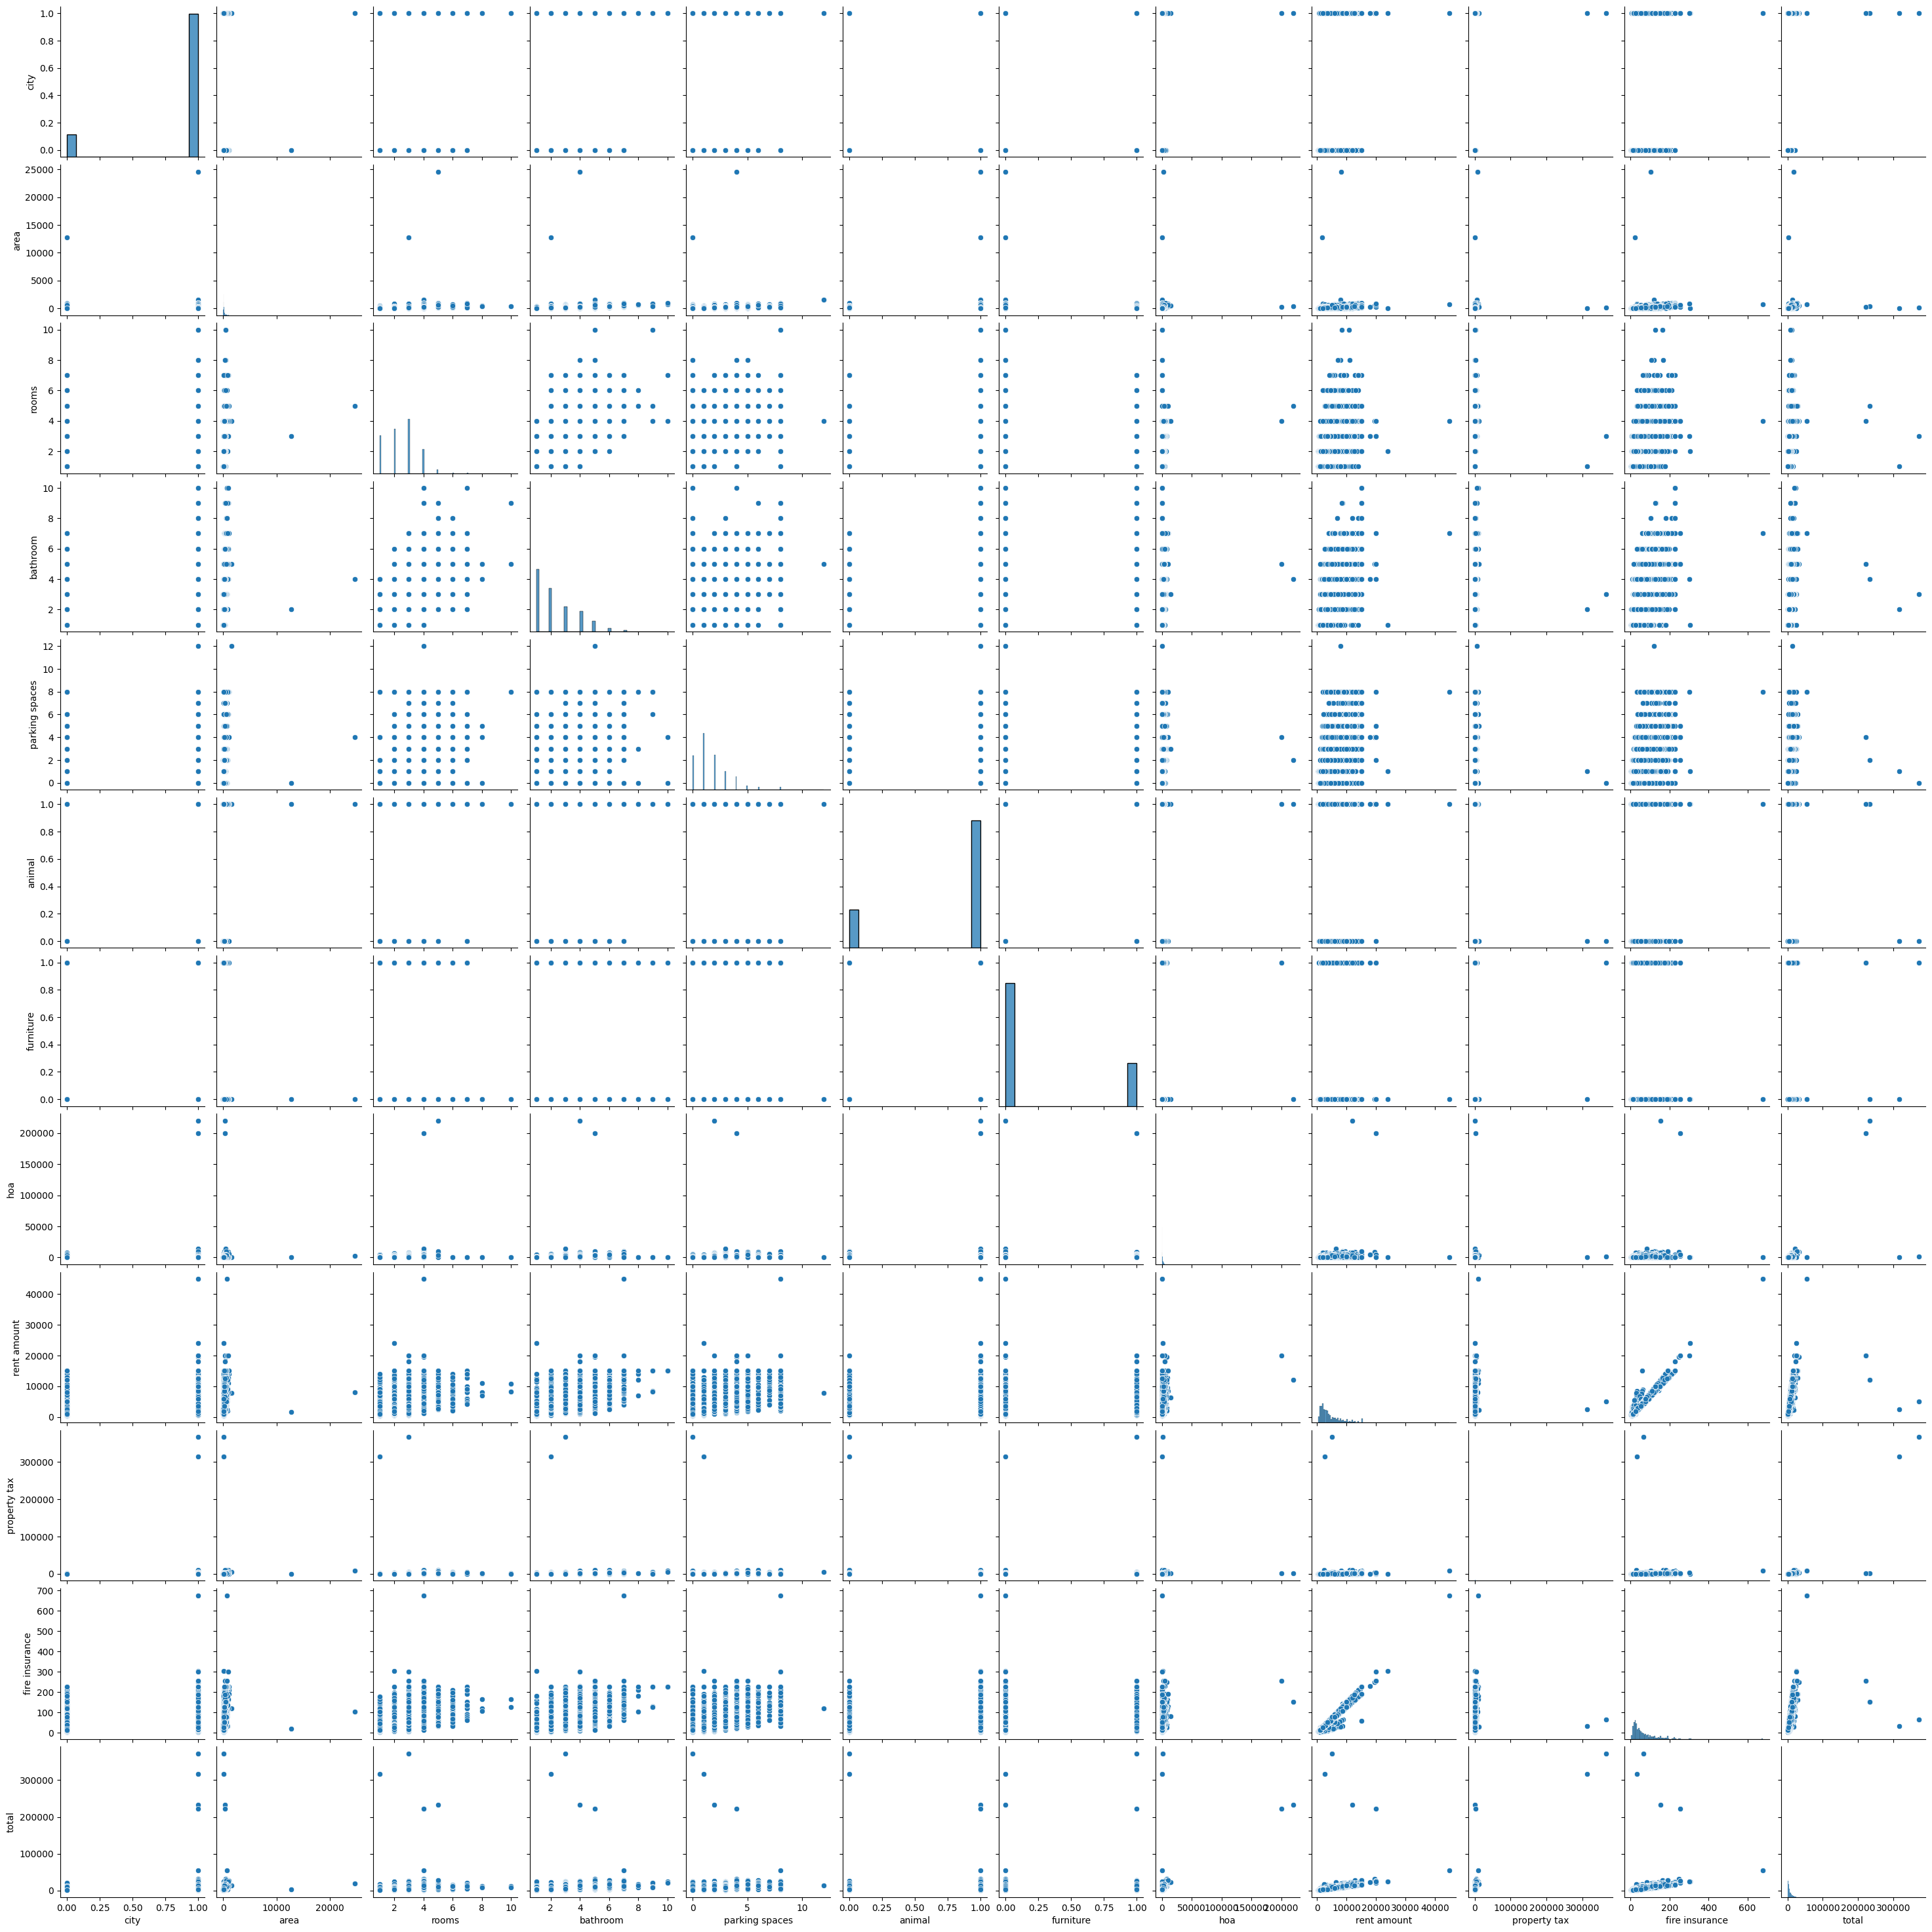

In [80]:
grid = sns.pairplot(df_aluguel)
plt.show()

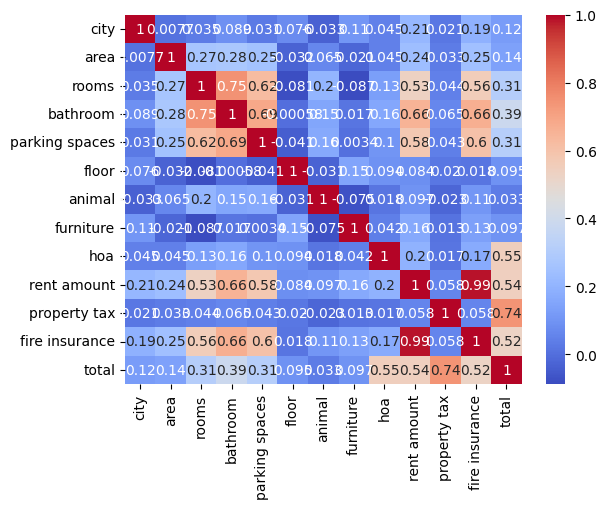

In [81]:
correl_matrix = df_aluguel.corr()
sns.heatmap(correl_matrix, annot=True, cmap='coolwarm')
plt.show()

In [82]:
df_aluguel = df_aluguel.dropna(subset=['hoa', 'property tax', 'fire insurance', 'total'])
df_aluguel

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0.0,8000.0,1000.0,121.0,9121.0
1,0,64,2,1,1,10,1,0,540.0,820.0,122.0,11.0,1493.0
2,1,443,5,5,4,3,1,1,4172.0,7000.0,1417.0,89.0,12680.0
3,1,73,2,2,1,12,1,0,700.0,1250.0,150.0,16.0,2116.0
4,1,19,1,1,0,0,0,0,0.0,1200.0,41.0,16.0,1257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,1,0,420.0,1150.0,0.0,15.0,1585.0
6076,1,84,2,2,1,16,0,1,768.0,2900.0,63.0,37.0,3768.0
6077,0,48,1,1,0,13,1,0,250.0,950.0,42.0,13.0,1255.0
6078,1,160,3,2,2,0,0,0,0.0,3500.0,250.0,53.0,3803.0


Coeficientes: [3.04134165e-02 7.14435933e+01]
Intercepto: 237.69489399254599
R²: 0.963038270343423
Erro Médio Quadrático (MSE): 460960.57681408717


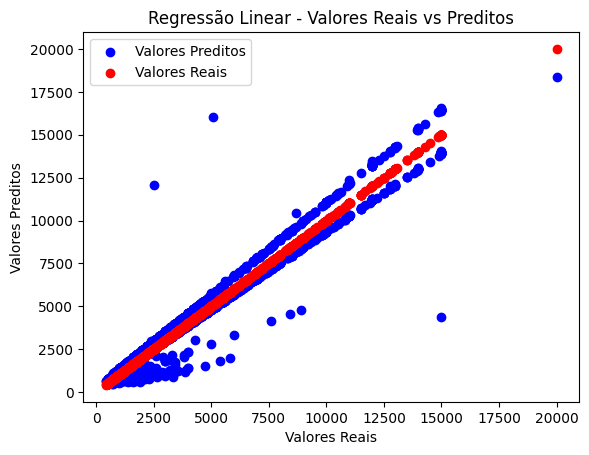

In [101]:
X = df_aluguel[['property tax', 'fire insurance']]
y = df_aluguel['rent amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("R²:", r2)
print("Erro Médio Quadrático (MSE):", mse)

plt.scatter(y_test, y_pred, color='blue', label='Valores Preditos')
plt.scatter(y_test, y_test, color='red', label='Valores Reais')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Regressão Linear - Valores Reais vs Preditos")
plt.legend()
plt.show()

## Regressão Logistica

In [86]:
df_cancer

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


In [89]:
df_cancer_grid = df_cancer.drop(columns=['Id'])
df_cancer_grid

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


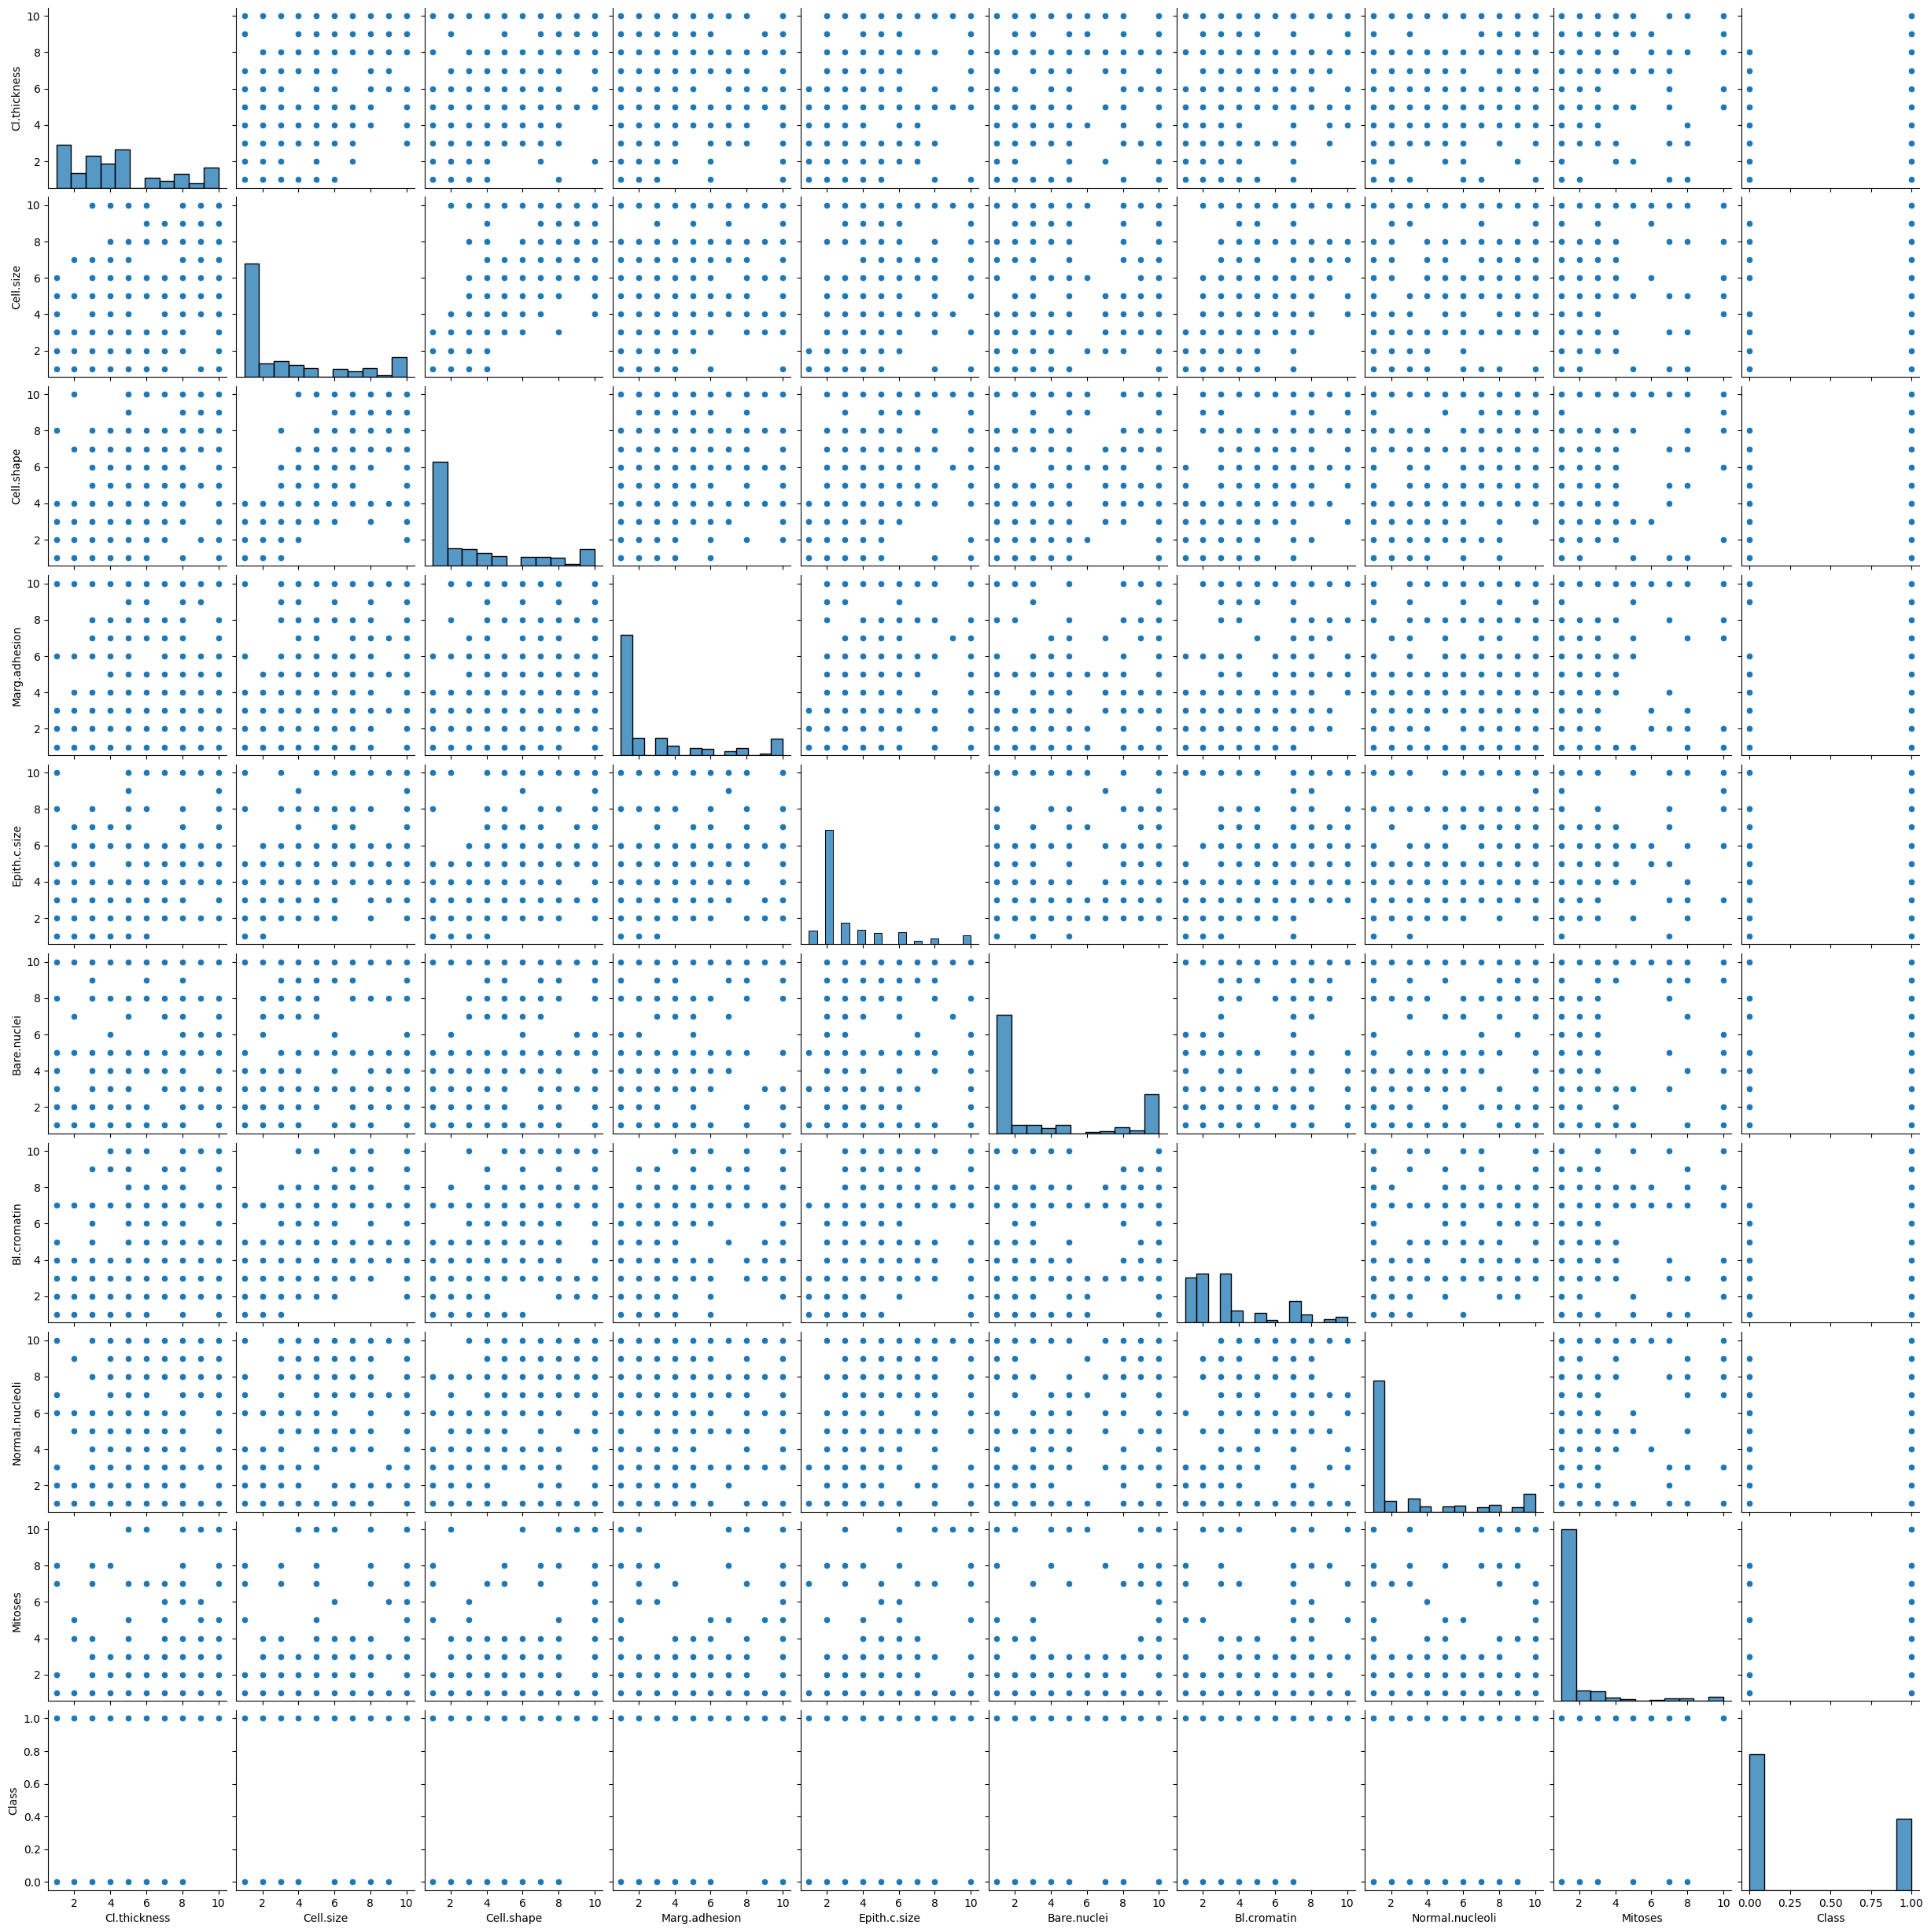

In [91]:
grid = sns.pairplot(df_cancer_grid)

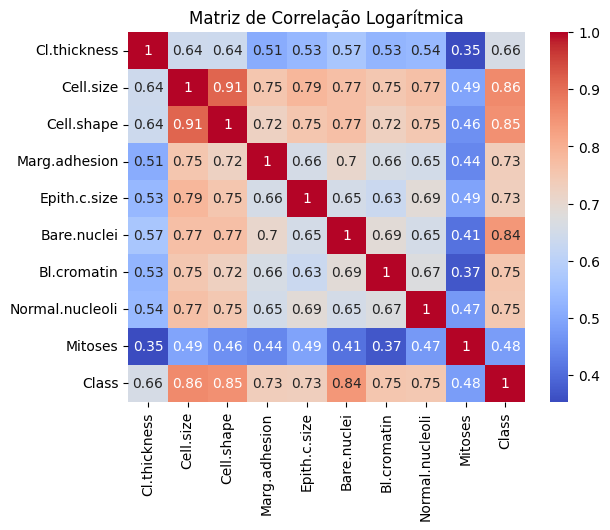

In [94]:

df_cancer_log = df_cancer_grid.copy()
df_cancer_log = df_cancer_log.apply(lambda x: np.log(x + 1) if np.issubdtype(x.dtype, np.number) else x)

correl_matrix_log = df_cancer_log.corr()

sns.heatmap(correl_matrix_log, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação Logarítmica')
plt.show()

In [96]:
df_cancer_grid = df_cancer_grid.dropna(subset=['Class'])

Acurácia: 0.9532163742690059


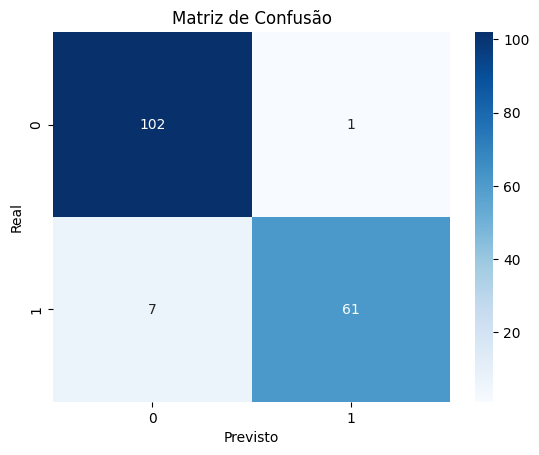

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
X = df_cancer_grid.drop(columns=['Class']).dropna()  
y = df_cancer_grid.loc[X.index, 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Acurácia:", accuracy)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()